In [1]:
import os
import glob
import shutil

import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns

#from pathlib import Path


In [2]:
import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]

def label_figure(fig, data_identifier):                                                                                                                                     
    fig.text(0, 1,data_identifier, ha='left', va='top', fontsize=8)    

In [3]:
%matplotlib notebook

# Set source dirs

In [4]:
home_dir = '/n/coxfs01/julianarhee/face-tracking'
project = 'facetracking-jyr-2020-01-25' #'sideface-jyr-2020-01-09'
video_dir = os.path.join(home_dir, project, 'videos')

In [5]:
rootdir = '/n/coxfs01/2p-data'
eyetracker_dir = os.path.join(rootdir, 'eyetracker_tmp')

In [15]:
analysis_dir = os.path.join(project_dir, 'pose-analysis') # DLC analysis output dir

# Network info

In [178]:

projectid = 'facetrackingJan25'
project_dir = os.path.join(home_dir, project)

scorer='DLC_resnet50'
iteration = 1
shuffle = 1
trainingsetindex=0
videotype='.mp4'

snapshot = 391800 #430200 #20900


DLCscorer = '%s_%sshuffle%i_%i' % (scorer, projectid, shuffle, snapshot)
print("Extracting results from scorer: %s" % DLCscorer)

Extracting results from scorer: DLC_resnet50_facetrackingJan25shuffle1_391800


In [179]:
glob.glob(os.path.join(project_dir, 'dlc-models', 'iteration-%i' % iteration,\
                      '%s-trainset95shuffle%i' % (projectid, shuffle), 'train', 'snapshot-*.meta'))


['/n/coxfs01/julianarhee/face-tracking/facetracking-jyr-2020-01-25/dlc-models/iteration-1/facetrackingJan25-trainset95shuffle1/train/snapshot-391500.meta',
 '/n/coxfs01/julianarhee/face-tracking/facetracking-jyr-2020-01-25/dlc-models/iteration-1/facetrackingJan25-trainset95shuffle1/train/snapshot-391400.meta',
 '/n/coxfs01/julianarhee/face-tracking/facetracking-jyr-2020-01-25/dlc-models/iteration-1/facetrackingJan25-trainset95shuffle1/train/snapshot-391600.meta',
 '/n/coxfs01/julianarhee/face-tracking/facetracking-jyr-2020-01-25/dlc-models/iteration-1/facetrackingJan25-trainset95shuffle1/train/snapshot-391700.meta',
 '/n/coxfs01/julianarhee/face-tracking/facetracking-jyr-2020-01-25/dlc-models/iteration-1/facetrackingJan25-trainset95shuffle1/train/snapshot-391800.meta']

# Get aggregate data

In [450]:
from pipeline.python.classifications import get_dataset_stats as gd
import cPickle as pkl

options = ['-t', 'traces001']
optsE = gd.extract_options(options)

rootdir = optsE.rootdir
aggregate_dir = optsE.aggregate_dir
fov_type = optsE.fov_type
traceid = optsE.traceid
response_type = 'dff'
print aggregate_dir

sdata_fpath = os.path.join(aggregate_dir, 'dataset_info.pkl')
if os.path.exists(sdata_fpath):
    with open(sdata_fpath, 'rb') as f:
        sdata = pkl.load(f)
else:
    sdata = gd.aggregate_session_info(traceid=optsE.traceid, trace_type=optsE.trace_type, 
                                       state=optsE.state, fov_type=optsE.fov_type, 
                                       visual_areas=optsE.visual_areas,
                                       blacklist=optsE.blacklist, 
                                       rootdir=optsE.rootdir)
    with open(sdata_fpath, 'wb') as f:
        pkl.dump(sdata, f, protocol=pkl.HIGHEST_PROTOCOL)


/n/coxfs01/julianarhee/aggregate-visual-areas


In [451]:
curr_exp = 'blobs'
dsets = sdata[sdata['experiment']==curr_exp].reset_index()


In [452]:
dsets.head()

,index,animalid,experiment,fov,session,visual_area
0,2,JC084,blobs,FOV1_zoom2p0x,20190522,V1
1,6,JC084,blobs,FOV1_zoom2p0x,20190525,Lm
2,12,JC091,blobs,FOV1_zoom2p0x,20190627,Lm
3,16,JC091,blobs,FOV1_zoom2p0x,20191008,Li
4,22,JC091,blobs,FOV1_zoom2p0x,20190607,Li


In [453]:
fovnums = [int(fv.split('_')[0][3:]) for fv in dsets['fov']]
dsets['fovnum'] = fovnums


In [454]:
dsets.head()

,index,animalid,experiment,fov,session,visual_area,fovnum
0,2,JC084,blobs,FOV1_zoom2p0x,20190522,V1,1
1,6,JC084,blobs,FOV1_zoom2p0x,20190525,Lm,1
2,12,JC091,blobs,FOV1_zoom2p0x,20190627,Lm,1
3,16,JC091,blobs,FOV1_zoom2p0x,20191008,Li,1
4,22,JC091,blobs,FOV1_zoom2p0x,20190607,Li,1


In [455]:
dsets.index

RangeIndex(start=0, stop=37, step=1)

In [456]:
# incl_sessions = ['20190522', '20191006', '20190616',
#                  '20190609', '20190614', '20191018']

# dsets = dsets[dsets['session'].isin(incl_sessions)]


In [457]:
incl_skeys = list(set([os.path.split(f)[-1].split('_f')[0] for f in glob.glob(os.path.join(analysis_dir, '*.h5'))]))

incl_sessions = ['_'.join(s.split('_')[0:2]) for s in incl_skeys]


In [458]:
incl_sessions

['20190606_JC091',
 '20190614_JC091',
 '20190501_JC076',
 '20190603_JC080',
 '20190605_JC090',
 '20190513_JC078',
 '20190510_JC083',
 '20190517_JC083',
 '20190622_JC085',
 '20190609_JC099',
 '20190506_JC080',
 '20191111_JC120',
 '20190508_JC083',
 '20190522_JC084',
 '20190512_JC083',
 '20190627_JC091',
 '20190607_JC091',
 '20190617_JC099',
 '20190525_JC084',
 '20191018_JC113',
 '20190602_JC091',
 '20190430_JC078',
 '20190504_JC078',
 '20190507_JC083',
 '20191006_JC110',
 '20190509_JC078',
 '20190511_JC083',
 '20191105_JC117',
 '20190613_JC097',
 '20190616_JC097',
 '20190612_JC099',
 '20190420_JC076']

In [459]:

#excl_sessions = ['20190607']

#incl_sessions = [s for s in incl_sessions if s not in excl_sessions]

#dsets = dsets[dsets['session'].isin(incl_sessions)]

In [460]:
incl_ixs = [i for i in dsets.index.tolist() if '_'.join([dsets.loc[i]['session'], dsets.loc[i]['animalid']]) in incl_sessions]

In [461]:
dsets = dsets.iloc[incl_ixs]

In [462]:
dsets.groupby(['visual_area']).count()


,index,animalid,experiment,fov,session,fovnum
visual_area,,,,,,
Li,11,11,11,11,11,11
Lm,11,11,11,11,11,11
V1,10,10,10,10,10,10


In [463]:
dsets[dsets['session']=='20190607']

,index,animalid,experiment,fov,session,visual_area,fovnum
4,22,JC091,blobs,FOV1_zoom2p0x,20190607,Li,1


In [474]:
reload(util)

<module 'pipeline.python.classifications.experiment_classes' from '/home/julianarhee/Repositories/2p-pipeline/pipeline/python/classifications/experiment_classes.py'>

In [705]:
DATA = {}
MODELS = {}
R2list = []
bad_datafiles = []
for (visual_area, animalid, session, fovnum), g in dsets.groupby(['visual_area', 'animalid', 'session', 'fovnum']):

    datakey ='%s_%s_fov%i_%s' % (session, animalid, fovnum, curr_exp)  

    #if session == '20190617' and animalid=='JC097':
    #    continue
        
#     # Get the face and neural data
#     pupilstats, neuraldata, labels = get_face_and_neural_stats(animalid, session, fovnum, curr_exp, analysis_dir,
#                                                                traceid='traces001', eyetracker_dir=eyetracker_dir)

#     # Calculate residuals
#     if residuals_pupil is None or residuals_neural is None:
#         bad_datafiles.extend(bad_files)
#         continue
    pupilstats, neuraldata, labels = get_face_and_neural_stats(animalid, session, fovnum, curr_exp, analysis_dir,
                                       traceid='traces001', eyetracker_dir=eyetracker_dir)

    # Remove trials where pupil data is bad
    included_trials = pupilstats['trial'].unique()
    print("Found pupil data for %i out of %i trials." % (len(included_trials), neuraldata.shape[0]))   

    # Remove trials where pupil data is bad
    included_trial_ixs = pupilstats.index.tolist() #included_trials = pupilstats['trial'].unique()
    print("Found pupil data for %i out of %i trials." % (len(included_trial_ixs), neuraldata.shape[0]))   

    # Only get subset of trials that we need
    neuralstats = neuraldata.loc[included_trial_ixs] #included_trial_ixs = [int(t-1) for t in included_trials]

    # Get residuals for pupil and neural data
    residuals_neural = subtract_condition_mean(neuralstats, labels, included_trials)
    residuals_pupil = pupilstats.copy()
    residuals_pupil_vals = subtract_condition_mean(pd.DataFrame(pupilstats['pupil']), labels, included_trials)
    residuals_pupil['pupil'] = residuals_pupil_vals

    DATA[datakey] = {'pupil': pupilstats,
                     'neural': neuralstats,
                     'residuals_neural': residuals_neural,
                     'residuals_pupil': residuals_pupil}
    
    # Fit model to     
    ols, R2 = fit_linear_model(residuals_pupil, residuals_neural,
                               visual_area=visual_area, datakey=datakey,
                               indepvar_x='pupildiam')

    MODELS[datakey] = ols
    R2list.append(R2)

R2_all = pd.concat(R2list, axis=0)
R2_all['sig'] = [1 if p<0.01 else 0 for p in R2_all['pval']]


... [JC090|20190605|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... loading data array
/n/coxfs01/2p-data/JC090/20190605/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_5afb30_traces001_ea6bc7_traces001_9747d8_traces001_70031f_traces001_ba4282_traces001_c2eec5_traces001_5c088e/data_arrays/np_subtracted.npz
NP_subtracted offset was: 12.60
adding NP offset... (NP baseline offset: 524.27)
((219090, 271), (271,), ())
... adjusting for equal reps / condn...
... updating self
('[blobs] Found runs:', [1, 2, 3, 4, 5, 6, 7])
... finding movies for dset: 20190605_JC090_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20190605_JC090_fov1_blobs_f1_20190605141933120131')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20190605_JC090_fov1_blobs_f2_20190605151304470267')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20190605_JC090_fov1_blobs_f3_20190605160757630689')
(3, '/n/coxfs01/2p-data/eyetracker_

/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py:17: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py:28: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


Checking for missing frames.
[428, 6719, 21359]
... found 3 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 26825 to 26843 frames
Full run duration: 22.37 min


/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py:36: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


--- |blobs|: getting MW info for run_2
('Eyetracker:', '20190605_JC090_fov1_blobs_f2_20190605151304470267')
----- File 2.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 24159 to 24159 frames
Full run duration: 20.13 min
--- |blobs|: getting MW info for run_3
('Eyetracker:', '20190605_JC090_fov1_blobs_f3_20190605160757630689')
----- File 3.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 17854 to 17854 frames
Full run duration: 14.88 min
--- |blobs|: getting MW info for run_4
('Eyetracker:', '20190605_JC090_fov1_blobs_f4_20190605171707227152')
----- File 4.-----
Checking for missing frames.
[2639, 10139, 12798, 16859, 20425]
... found 5 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding

('Eyetracker:', '20190606_JC091_fov1_blobs_f1_20190606163148451173')
----- File 1.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 20708 to 20708 frames
Full run duration: 17.26 min
--- |blobs|: getting MW info for run_2
('Eyetracker:', '20190606_JC091_fov1_blobs_f2_20190606172228099376')
----- File 2.-----
Checking for missing frames.
[3096]
... found 1 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 12339 to 12345 frames
Full run duration: 10.29 min
--- |blobs|: getting MW info for run_3
('Eyetracker:', '20190606_JC091_fov1_blobs_f3_20190606174323494731')
----- File 3.-----
Checking for missing frames.
[15065]
... found 1 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 19464 to 19470 frames
Full run duration: 16.23 min
--- |blobs|: getting MW info for run_4
('Eyetracker:', '20190606_JC091_fov1_blobs_f4_20190606182920549874')


NP_subtracted offset was: 15.62
adding NP offset... (NP baseline offset: 327.45)
((201000, 533), (533,), ())
... updating self
('[blobs] Found runs:', [1, 2, 3, 4, 5, 6])
... finding movies for dset: 20190614_JC091_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20190614_JC091_fov1_blobs_f1_20190614161718232598')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20190614_JC091_fov1_blobs_f2_20190614172047345542')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20190614_JC091_fov1_blobs_f3_20190614180747417824')
(3, '/n/coxfs01/2p-data/eyetracker_tmp/20190614_JC091_fov1_blobs_f4_20190614185736563063')
(4, '/n/coxfs01/2p-data/eyetracker_tmp/20190614_JC091_fov1_blobs_f5_20190614195320745745')
(5, '/n/coxfs01/2p-data/eyetracker_tmp/20190614_JC091_fov1_blobs_f6_20190614200902650477')
--- |blobs|: getting MW info for run_1
('Eyetracker:', '20190614_JC091_fov1_blobs_f1_20190614161718232598')
----- File 1.-----
Checking for missing frames.
[3416, 6839, 6840, 7199, 7259, 7262, 7264, 7266, 7268, 7270, 7379, 7499,

--- |blobs|: getting MW info for run_5
('Eyetracker:', '20190609_JC099_fov1_blobs_f5_20190609154127271261')
----- File 5.-----
Checking for missing frames.
[7812, 10439, 14699]
... found 3 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 16728 to 16746 frames
Full run duration: 13.96 min
--- |blobs|: getting MW info for run_6
('Eyetracker:', '20190609_JC099_fov1_blobs_f6_20190609155730800664')
----- File 6.-----
Checking for missing frames.
[3059, 7499, 9024]
... found 3 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 16947 to 16965 frames
Full run duration: 14.14 min
... checking movies for dset: 20190609_JC099_fov1_blobs
... found 6 DLC outfiles, expecting 6 based on found eyetracker dirs.
...cur

Checking for missing frames.
[1019]
... found 1 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 18530 to 18536 frames
Full run duration: 15.45 min
--- |blobs|: getting MW info for run_2
('Eyetracker:', '20190617_JC099_fov1_blobs_f2_20190617130412072416')
----- File 2.-----
Checking for missing frames.
[14819]
... found 1 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 17118 to 17124 frames
Full run duration: 14.27 min
--- |blobs|: getting MW info for run_3
('Eyetracker:', '20190617_JC099_fov1_blobs_f3_20190617134947813306')
----- File 3.-----
Checking for missing frames.
[2339, 8931, 9716]
... found 3 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 16284 to 16302 frames
Full run duration: 13.59 min
--- |blobs|: getting MW info for run_4


... checking movies for dset: 20191018_JC113_fov1_blobs
... found 12 DLC outfiles, expecting 12 based on found eyetracker dirs.
...curr run: 1 [20191018_JC113_fov1_blobs_f1DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 2 [20191018_JC113_fov1_blobs_f2DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 3 [20191018_JC113_fov1_blobs_f3DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 4 [20191018_JC113_fov1_blobs_f4DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 5 [20191018_JC113_fov1_blobs_f5DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 6 [20191018_JC113_fov1_blobs_f6DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 7 [20191018_JC113_fov1_blobs_f7DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 8 [20191018_JC113_fov1_blobs_f8DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 9 [20191018_JC113_fov1_blobs_f9DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 1 [20191018_J

--- [trial 2076] warning, run_num 10 not found in pupildata. skipping...
--- [trial 2077] warning, run_num 10 not found in pupildata. skipping...
--- [trial 2078] warning, run_num 10 not found in pupildata. skipping...
--- [trial 2079] warning, run_num 10 not found in pupildata. skipping...
--- [trial 2080] warning, run_num 10 not found in pupildata. skipping...
--- [trial 2081] warning, run_num 10 not found in pupildata. skipping...
--- [trial 2082] warning, run_num 10 not found in pupildata. skipping...
--- [trial 2083] warning, run_num 10 not found in pupildata. skipping...
--- [trial 2084] warning, run_num 10 not found in pupildata. skipping...
--- [trial 2085] warning, run_num 10 not found in pupildata. skipping...
--- [trial 2086] warning, run_num 10 not found in pupildata. skipping...
--- [trial 2087] warning, run_num 10 not found in pupildata. skipping...
--- [trial 2088] warning, run_num 10 not found in pupildata. skipping...
--- [trial 2089] warning, run_num 10 not found in p

--- [trial 2297] warning, run_num 11 not found in pupildata. skipping...
--- [trial 2298] warning, run_num 11 not found in pupildata. skipping...
--- [trial 2299] warning, run_num 11 not found in pupildata. skipping...
--- [trial 2300] warning, run_num 11 not found in pupildata. skipping...
--- [trial 2301] warning, run_num 11 not found in pupildata. skipping...
--- [trial 2302] warning, run_num 11 not found in pupildata. skipping...
--- [trial 2303] warning, run_num 11 not found in pupildata. skipping...
--- [trial 2304] warning, run_num 11 not found in pupildata. skipping...
--- [trial 2305] warning, run_num 11 not found in pupildata. skipping...
--- [trial 2306] warning, run_num 11 not found in pupildata. skipping...
--- [trial 2307] warning, run_num 11 not found in pupildata. skipping...
--- [trial 2308] warning, run_num 11 not found in pupildata. skipping...
--- [trial 2309] warning, run_num 11 not found in pupildata. skipping...
--- [trial 2310] warning, run_num 11 not found in p

... [JC120|20191111|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... loading data array
/n/coxfs01/2p-data/JC120/20191111/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_603e33_traces001_b209e8_traces001_0b0a19_traces001_67c45c_traces001_8513ce_traces001_12f240/data_arrays/np_subtracted.npz
NP_subtracted offset was: -32.03
adding NP offset... (NP baseline offset: 169.75)
((202500, 190), (190,), ())
... updating self
('[blobs] Found runs:', [1, 2, 3, 4, 5, 6])
... finding movies for dset: 20191111_JC120_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20191111_JC120_fov1_blobs_f1_20191111174912021855')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20191111_JC120_fov1_blobs_f2_20191111180509719344')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20191111_JC120_fov1_blobs_f3_20191111192242972573')
(3, '/n/coxfs01/2p-data/eyetracker_tmp/20191111_JC120_fov1_blobs_f4_20191111193729820297')
(4,

--- |blobs|: getting MW info for run_6
('Eyetracker:', '20191111_JC120_fov1_blobs_f6_20191111205418868821')
----- File 6.-----
Checking for missing frames.
[719, 779, 1739, 1799, 2039, 2699, 2939, 4319, 4859, 5099, 6479, 6539, 6599, 6719, 7439, 7559, 8699, 8759, 8999, 9059, 9239, 9419, 9539, 9659, 9779, 9839, 9959, 10019, 10079, 10199, 10319, 11279, 11459, 11639, 11699, 11819, 11879, 11939, 12179, 12299, 12479, 12779, 12839, 13019, 13199, 13439, 13499, 13559, 15899, 16019, 16439]
... found 51 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpol

... checking movies for dset: 20190430_JC078_fov1_blobs
... found 6 DLC outfiles, expecting 6 based on found eyetracker dirs.
...curr run: 1 [20190430_JC078_fov1_blobs_f1DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 2 [20190430_JC078_fov1_blobs_f2DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 3 [20190430_JC078_fov1_blobs_f3DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 4 [20190430_JC078_fov1_blobs_f4DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 5 [20190430_JC078_fov1_blobs_f5DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 6 [20190430_JC078_fov1_blobs_f6DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
... getting responsive cells (test: ROC, thr: 0.05')
-- stats: combined_blobs_static
['/n/coxfs01/2p-data/JC078/20190430/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_dfb5b6_traces001_929bd6_traces001_383b98_traces001_e649db_traces001_9a1a48_traces001_f5276a/summary_stats/ROC/roc_results.pkl']
101 out 

--- |blobs|: getting MW info for run_5
('Eyetracker:', '20190509_JC078_fov1_blobs_f5_20190509135611331403')
----- File 5.-----
Checking for missing frames.
[15484]
... found 1 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 23369 to 23375 frames
Full run duration: 19.48 min
--- |blobs|: getting MW info for run_6
('Eyetracker:', '20190509_JC078_fov1_blobs_f6_20190509143341637468')
----- File 6.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 22063 to 22063 frames
Full run duration: 18.39 min
... checking movies for dset: 20190509_JC078_fov1_blobs
... found 6 DLC outfiles, expecting 6 based on found eyetracker dirs.
...curr run: 1 [20190509_JC078_fov1_blobs_f1DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 2 [20190509_JC078_fov1_blobs_f2DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 3 [20190509_JC078_fov1_blobs_f3DLC_resnet50_facetrackingJan25shuffle1

Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 17975 to 17975 frames
Full run duration: 14.98 min
--- |blobs|: getting MW info for run_6
('Eyetracker:', '20190506_JC080_fov1_blobs_f6_20190506210607925635')
----- File 6.-----
Checking for missing frames.
[4255, 7383, 19358]
... found 3 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 22610 to 22628 frames
Full run duration: 18.86 min
... checking movies for dset: 20190506_JC080_fov1_blobs
... found 4 DLC outfiles, expecting 6 based on found eyetracker dirs.
...curr run: 1 [20190506_JC080_fov1_blobs_f1DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 2 [20190506_JC080_fov1_blobs_f2DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 3 [20190506_JC080_fov1_blobs_f3DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr r

--- [trial 1381] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1382] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1383] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1384] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1385] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1386] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1387] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1388] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1389] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1390] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1391] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1392] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1393] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1394] warning, run_num 6 not found in pupildata. skip

--- |blobs|: getting MW info for run_6
('Eyetracker:', '20190603_JC080_fov1_blobs_f6_20190603223742301912')
----- File 6.-----
Checking for missing frames.
[9179]
... found 1 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 17478 to 17484 frames
Full run duration: 14.57 min
... checking movies for dset: 20190603_JC080_fov1_blobs
... found 6 DLC outfiles, expecting 6 based on found eyetracker dirs.
...curr run: 1 [20190603_JC080_fov1_blobs_f1DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 2 [20190603_JC080_fov1_blobs_f2DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 3 [20190603_JC080_fov1_blobs_f3DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 4 [20190603_JC080_fov1_blobs_f4DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 5 [20190603_JC080_fov1_blobs_f5DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 6 [20190603_JC080_fov1_blobs_f6DLC_resnet50_facetrackingJan25shu

... frame info shape changed from 21773 to 21803 frames
Full run duration: 18.17 min
--- |blobs|: getting MW info for run_5
('Eyetracker:', '20190512_JC083_fov1_blobs_f5_20190512151235327586')
----- File 5.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 9885 to 9885 frames
Full run duration: 8.24 min
--- |blobs|: getting MW info for run_6
('Eyetracker:', '20190512_JC083_fov1_blobs_f6_20190512152943893769')
----- File 6.-----
Checking for missing frames.
[11106]
... found 1 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 19350 to 19356 frames
Full run duration: 16.13 min
--- |blobs|: getting MW info for run_7
('Eyetracker:', '20190512_JC083_fov1_blobs_f7_20190512164710136564')
----- File 7.-----
Checking for missing frames.
[13750]
... found 1 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 22449 to 22455 frames
Full run durati

--- |blobs|: getting MW info for run_2
('Eyetracker:', '20190525_JC084_fov1_blobs_f2_20190525150720963293')
----- File 2.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 18882 to 18882 frames
Full run duration: 15.74 min
--- |blobs|: getting MW info for run_3
('Eyetracker:', '20190525_JC084_fov1_blobs_f3_20190525160339117588')
----- File 3.-----
Checking for missing frames.
[13531, 17553]
... found 2 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 18678 to 18690 frames
Full run duration: 15.58 min
--- |blobs|: getting MW info for run_4
('Eyetracker:', '20190525_JC084_fov1_blobs_f4_20190525172142146175')
----- File 4.-----
Checking for missing frames.
[843, 12414, 12415, 12416, 12417]
... found 5 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames

--- |blobs|: getting MW info for run_2
('Eyetracker:', '20190420_JC076_fov1_blobs_f2_20190420170000858639')
----- File 2.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 23795 to 23795 frames
Full run duration: 19.83 min
--- |blobs|: getting MW info for run_3
('Eyetracker:', '20190420_JC076_fov1_blobs_f3_20190420175730479481')
----- File 3.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 26049 to 26049 frames
Full run duration: 21.71 min
--- |blobs|: getting MW info for run_4
('Eyetracker:', '20190420_JC076_fov1_blobs_f4_20190420190325744345')
----- File 4.-----
Checking for missing frames.
[21148]
... found 1 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 25960 to 25966 frames
Full run duration: 21.64 min
--- |blobs|: getting MW info for run_5
('Eyetracker:', '20190420_JC076_fov1_blobs_f5_20190420195949276845')
----- File 5

--- [trial 1381] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1382] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1383] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1384] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1385] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1386] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1387] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1388] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1389] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1390] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1391] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1392] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1393] warning, run_num 6 not found in pupildata. skipping...
--- [trial 1394] warning, run_num 6 not found in pupildata. skip

... getting responsive cells (test: ROC, thr: 0.05')
-- stats: combined_blobs_static
['/n/coxfs01/2p-data/JC076/20190501/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_8bada5_traces001_f32281_traces001_8843f0_traces001_8c6f4b_traces001_62f205_traces001_185b69/summary_stats/ROC/roc_results.pkl']
41 out of 242 cells pass responsive test.
Found pupil data for 999 out of 1500 trials.
Found pupil data for 999 out of 1500 trials.
... [JC083|20190507|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... loading data array
/n/coxfs01/2p-data/JC083/20190507/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_8afe5f_traces001_7ab5af_traces001_488b31_traces001_c8dfc7_traces001_df5b92_traces001_431894/data_arrays/np_subtracted.npz
NP_subtracted offset was: 77.17
adding NP offset... (NP baseline offset: 413.01)
((268500, 182), (182,), ())
... updating self
('[blobs] Found runs:', [1, 2, 3,

... checking movies for dset: 20190510_JC083_fov1_blobs
... found 7 DLC outfiles, expecting 7 based on found eyetracker dirs.
...curr run: 1 [20190510_JC083_fov1_blobs_f1DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 2 [20190510_JC083_fov1_blobs_f2DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 3 [20190510_JC083_fov1_blobs_f3DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 4 [20190510_JC083_fov1_blobs_f4DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 5 [20190510_JC083_fov1_blobs_f5DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 6 [20190510_JC083_fov1_blobs_f6DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 7 [20190510_JC083_fov1_blobs_f7DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
--- [trial 1] warning, run_num 1 not found in pupildata. skipping...
--- [trial 2] warning, run_num 1 not found in pupildata. skipping...
--- [trial 3] warning, run_num 1 not found in pupildata. skipping...
--- [tria

... getting responsive cells (test: ROC, thr: 0.05')
-- stats: combined_blobs_static
['/n/coxfs01/2p-data/JC083/20190510/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_54393b_traces001_0152b8_traces001_d41efc_traces001_cd9df6_traces001_aab980_traces001_84e961_traces001_ba9020/summary_stats/ROC/roc_results.pkl']
75 out of 192 cells pass responsive test.
Found pupil data for 787 out of 1750 trials.
Found pupil data for 787 out of 1750 trials.
... [JC083|20190511|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... loading data array
/n/coxfs01/2p-data/JC083/20190511/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_95dedb_traces001_e403bc_traces001_78845b_traces001_045759_traces001_e7bfd6_traces001_c43fca/data_arrays/np_subtracted.npz
NP_subtracted offset was: 95.94
adding NP offset... (NP baseline offset: 430.59)
((268500, 177), (177,), ())
... updating self
('[blobs] Found 

...curr run: 2 [20190522_JC084_fov1_blobs_f2DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 3 [20190522_JC084_fov1_blobs_f3DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 4 [20190522_JC084_fov1_blobs_f4DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 5 [20190522_JC084_fov1_blobs_f5DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 6 [20190522_JC084_fov1_blobs_f6DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
... getting responsive cells (test: ROC, thr: 0.05')
-- stats: combined_blobs_static
['/n/coxfs01/2p-data/JC084/20190522/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_ea0b53_traces001_92d492_traces001_af4cfd_traces001_9188fa_traces001_b44714_traces001_133108/summary_stats/ROC/roc_results.pkl']
100 out of 260 cells pass responsive test.
Found pupil data for 1471 out of 1500 trials.
Found pupil data for 1471 out of 1500 trials.
... [JC085|20190622|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting dat

... frame info shape changed from 16857 to 16893 frames
Full run duration: 14.08 min
--- |blobs|: getting MW info for run_3
('Eyetracker:', '20190613_JC097_fov1_blobs_f3_20190613162804722691')
----- File 3.-----
Checking for missing frames.
[2879, 6962, 6963, 6964, 6966, 14039]
... found 6 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 18005 to 18041 frames
Full run duration: 15.04 min
--- |blobs|: getting MW info for run_4
('Eyetracker:', '20190613_JC097_fov1_blobs_f4_20190613172252333534')
----- File 4.-----
Checking for missing frames.
[1319, 3119, 5099, 5519, 7079, 7180, 11519, 11579, 13195, 13196, 13197, 13198, 16319]
... found 13 funky frame chunks.
... interpolating 6 frames
... adding 6 frames


--- |blobs|: getting MW info for run_4
('Eyetracker:', '20190616_JC097_fov1_blobs_f4_20190616185113027563')
----- File 4.-----
Checking for missing frames.
[8512, 9419, 18479]
... found 3 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 21585 to 21603 frames
Full run duration: 18.00 min
--- |blobs|: getting MW info for run_5
('Eyetracker:', '20190616_JC097_fov1_blobs_f5_20190616194806552609')
----- File 5.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 17683 to 17683 frames
Full run duration: 14.74 min
--- |blobs|: getting MW info for run_6
('Eyetracker:', '20190616_JC097_fov1_blobs_f6_20190616202427805270')
----- File 6.-----
Checking for missing frames.
[2639]
... found 1 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 18389 to 18395

In [706]:
R2_all = pd.concat(R2list, axis=0)

R2_all['sig'] = [1 if p<0.01 else 0 for p in R2_all['pval']]


In [707]:
# SAVE
data_outfile = os.path.join(analysis_dir, 'data-models_snapshot-%i.pkl' % (snapshot))
with open(data_outfile, 'wb') as f:
    pkl.dump({'models': MODELS, 'data': DATA}, f, protocol=pkl.HIGHEST_PROTOCOL)
             

#### debug

In [477]:
pupilstats, neuraldata, labels = get_face_and_neural_stats(animalid, session, fovnum, curr_exp, analysis_dir,
                                   traceid='traces001', eyetracker_dir=eyetracker_dir)



... [JC076|20190420|FOV1_zoom2p0x] creating blobs object
GET ROI SET: rois001
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... loading data array
/n/coxfs01/2p-data/JC076/20190420/FOV1_zoom2p0x/combined_blobs_static/traces/traces001_5ffca7_traces001_09c921_traces001_512e96_traces001_394d78_traces001_64e684_traces001_6bacb1/data_arrays/np_subtracted.npz
NP_subtracted offset was: 58.87
adding NP offset... (NP baseline offset: 289.30)
((249000, 300), (300,), ())
... updating self
('[blobs] Found runs:', [1, 2, 3, 4, 5, 6])
... finding movies for dset: 20190420_JC076_fov1_blobs
(0, '/n/coxfs01/2p-data/eyetracker_tmp/20190420_JC076_fov1_blobs_f1_20190420160410326599')
(1, '/n/coxfs01/2p-data/eyetracker_tmp/20190420_JC076_fov1_blobs_f2_20190420170000858639')
(2, '/n/coxfs01/2p-data/eyetracker_tmp/20190420_JC076_fov1_blobs_f3_20190420175730479481')
(3, '/n/coxfs01/2p-data/eyetracker_tmp/20190420_JC076_fov1_blobs_f4_20190420190325744345')
(4, 

/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py:17: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py:28: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py:36: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


Checking for missing frames.
[13526, 15634, 18313, 18314]
... found 4 funky frame chunks.
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... interpolating 6 frames
... adding 6 frames
... frame info shape changed from 23396 to 23420 frames
Full run duration: 19.52 min
--- |blobs|: getting MW info for run_2
('Eyetracker:', '20190420_JC076_fov1_blobs_f2_20190420170000858639')
----- File 2.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 23795 to 23795 frames
Full run duration: 19.83 min
--- |blobs|: getting MW info for run_3
('Eyetracker:', '20190420_JC076_fov1_blobs_f3_20190420175730479481')
----- File 3.-----
Checking for missing frames.
[]
... found 0 funky frame chunks.
... frame info shape changed from 26049 to 26049 frames
Full run duration: 21.71 min
--- |blobs|: getting MW info for run_4
('Eyetracker:', '20190420_JC076_fov1_blobs_f4_

IndexError: arrays used as indices must be of integer (or boolean) type

In [480]:
pupildata, bad_files = parse_pose_data(datakey, analysis_dir, eyetracker_dir=eyetracker_dir)

... checking movies for dset: 20190420_JC076_fov1_blobs
... found 6 DLC outfiles, expecting 6 based on found eyetracker dirs.
...curr run: 1 [20190420_JC076_fov1_blobs_f1DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 2 [20190420_JC076_fov1_blobs_f2DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 3 [20190420_JC076_fov1_blobs_f3DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 4 [20190420_JC076_fov1_blobs_f4DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 5 [20190420_JC076_fov1_blobs_f5DLC_resnet50_facetrackingJan25shuffle1_391800.h5]
...curr run: 6 [20190420_JC076_fov1_blobs_f6DLC_resnet50_facetrackingJan25shuffle1_391800.h5]


In [444]:
# Remove trials where pupil data is bad
#included_trials = pupilstats['trial'].unique()
included_trial_ixs = pupilstats.index.tolist()
print("Found pupil data for %i out of %i trials." % (len(included_trial_ixs), neuraldata.shape[0]))   

# Only get subset of trials that we need
#included_trial_ixs = [int(t-1) for t in included_trials]
neuralstats = neuraldata.loc[included_trial_ixs]


Found pupil data for 1582 out of 1600 trials.


In [446]:

# Get residuals for pupil and neural data
residuals_neural = subtract_condition_mean(neuralstats, labels, included_trial_ixs)
residuals_pupil = pupilstats.copy()
residuals_pupil_vals = subtract_condition_mean(pd.DataFrame(pupilstats['pupil']), labels, included_trials)
residuals_pupil['pupil'] = residuals_pupil_vals


In [390]:
def subtract_condition_mean(neuraldata, labels, included_trials):
    
    
    # Remove excluded trials and Calculate neural residuals
    trial_configs = pd.DataFrame(np.vstack([g['config'].iloc[0]\
                                        for trial, g in labels.groupby(['trial']) \
                                           if int(trial[5:]) in included_trials]), columns=['config']) # trials should be 1-indexed
    trial_configs = trial_configs.loc[included_trial_ixs]
    
    # Do mean subtraction for neural data
    residuals_neural = neuraldata.copy()
    for c, g in trial_configs.groupby(['config']):
        residuals_neural.loc[g.index] = neuraldata.loc[g.index] - neuraldata.loc[g.index].mean(axis=0)

    # Do mean subtraction for pupil data
#     residuals_pupil = pupilstats.copy()
#     for c, g in pupilstats.groupby(['config']):
#         residuals_pupil['pupil'][g.index] = pupilstats.loc[g.index]['pupil'] - pupilstats.loc[g.index]['pupil'].mean()
    

    return residuals_neural


In [410]:
class struct():
    pass

import scipy.stats as spstats

<IPython.core.display.Javascript object>


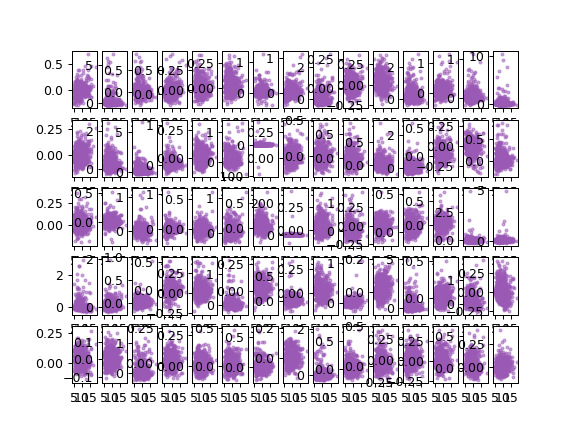

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(0, 10)
(0, 11)
(0, 12)
(0, 13)
(0, 14)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(1, 10)
(1, 11)
(1, 12)
(1, 13)
(1, 14)
(2, 0)
(2, 1)
(2, 2)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(2, 10)
(2, 11)
(2, 12)
(2, 13)
(2, 14)
(3, 0)
(3, 1)
(3, 2)
(3, 3)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(3, 10)
(3, 11)
(3, 12)
(3, 13)
(3, 14)
(4, 0)
(4, 1)
(4, 2)
(4, 3)
(4, 4)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(4, 10)
(4, 11)
(4, 12)
(4, 13)
(4, 14)


In [415]:
regresults = {}
nr=5; nc=15;
ri=0; ci=0;
fig = pl.figure()
for rid in residuals_neural.columns.tolist()[0:nr*nc]:
    print(ri, ci)
    
    # correlation (pupil v neural)
    x = pupilstats['pupil']
    y = neuralstats[rid]
    regr = struct()
    regr.slope, regr.intercept, regr.r_value, regr.p_value, regr.std_err = spstats.linregress(x, y)
    
    regresults[rid] = regr
    
    # plot
    ax = pl.subplot2grid((nr, nc), (ri, ci), colspan=1)
    ax.scatter(pupilstats['pupil'], neuralstats[rid], s=5, alpha=0.5)
    if ci == nc-1:
        ri += 1
        ci = 0
    else:
        ci += 1
    

In [416]:
regr.p_value

0.00013517561067257931

In [414]:
regr

<__main__.struct instance at 0x7fc33d77eb48>

# Get n cells per visual area

In [708]:
counts = dict((k, []) for k in ['V1', 'Lm', 'Li'])
for k, o in MODELS.items():
    print(k, len(o.keys()))
    sess, animal, fv, exp = k.split('_')
    varea = dsets[(dsets['animalid']==animal) & (dsets['session']==sess)]['visual_area'].iloc[0]
    
    counts[varea].append(len(o.keys()))

('20190603_JC080_fov1_blobs', 122)
('20190420_JC076_fov1_blobs', 45)
('20190525_JC084_fov1_blobs', 90)
('20190612_JC099_fov1_blobs', 64)
('20191006_JC110_fov1_blobs', 104)
('20190513_JC078_fov1_blobs', 68)
('20190510_JC083_fov1_blobs', 75)
('20190609_JC099_fov1_blobs', 62)
('20190605_JC090_fov1_blobs', 141)
('20190614_JC091_fov1_blobs', 122)
('20190522_JC084_fov1_blobs', 100)
('20190501_JC076_fov1_blobs', 41)
('20190627_JC091_fov1_blobs', 98)
('20190613_JC097_fov1_blobs', 116)
('20190430_JC078_fov1_blobs', 101)
('20191111_JC120_fov1_blobs', 46)
('20190504_JC078_fov1_blobs', 87)
('20190507_JC083_fov1_blobs', 96)
('20190617_JC099_fov1_blobs', 9)
('20191105_JC117_fov1_blobs', 31)
('20190506_JC080_fov1_blobs', 146)
('20190606_JC091_fov1_blobs', 110)
('20190622_JC085_fov1_blobs', 225)
('20190509_JC078_fov1_blobs', 69)
('20190602_JC091_fov1_blobs', 161)
('20191018_JC113_fov1_blobs', 59)
('20190512_JC083_fov1_blobs', 114)
('20190508_JC083_fov1_blobs', 122)
('20190607_JC091_fov1_blobs', 133)
(

In [709]:
for k, v in counts.items():
    print k, np.sum(v)

V1 1079
Lm 1095
Li 938


In [712]:
R2_all.groupby(['visual_area']).mean()

,R2,pval,sig
visual_area,,,
Li,0.011043,0.188331,0.477612
Lm,0.007054,0.223864,0.392694
V1,0.015760,0.141089,0.572753


In [718]:
R2_all[R2_all['sig']==1].groupby(['visual_area']).mean()

,R2,pval,sig
visual_area,,,
Li,0.021126,0.001397,1
Lm,0.015951,0.001245,1
V1,0.026299,0.000855,1


In [710]:
R2_all.groupby(['visual_area']).count()

,R2,datakey,pval,sig
visual_area,,,,
Li,938,938,938,938
Lm,1095,1095,1095,1095
V1,1079,1079,1079,1079


In [513]:
len(R2_all[R2_all['visual_area']=='Lm']['R2'].unique())


159

In [518]:
R2_all[R2_all['visual_area']=='Li'].dropna().shape

(64, 4)

#### Redo the fit

In [668]:
datakey

'20190616_JC097_fov1_blobs'

In [670]:
dsets.head()

,index,animalid,experiment,fov,session,visual_area,fovnum
0,2,JC084,blobs,FOV1_zoom2p0x,20190522,V1,1
1,6,JC084,blobs,FOV1_zoom2p0x,20190525,Lm,1
2,12,JC091,blobs,FOV1_zoom2p0x,20190627,Lm,1
4,22,JC091,blobs,FOV1_zoom2p0x,20190607,Li,1
5,26,JC091,blobs,FOV1_zoom2p0x,20190614,Li,1


In [713]:
f_MODELS = {}
f_R2list = []
for datakey in DATA.keys():
    residuals_neural = DATA[datakey]['neural']
    residuals_pupil = DATA[datakey]['pupil']
    session, animalid, fovn, cexp = datakey.split('_')
    fovnum = int(fovn[3:])
    visual_area = dsets[(dsets['animalid']==animalid) & (dsets['session']==session) & (dsets['fovnum']==fovnum)]['visual_area'].iloc[0]
    
    # Fit model to     
    ols, R2 = fit_linear_model(residuals_pupil, residuals_neural,
                               visual_area=visual_area, datakey=datakey,
                               indepvar_x='pupildiam')
    f_MODELS[datakey] = ols
    f_R2list.append(R2)

In [714]:

R2_f = pd.concat(f_R2list, axis=0)
R2_f['sig'] = [1 if p<0.01 else 0 for p in R2_f['pval']]


In [716]:
R2_f.groupby(['visual_area']).mean()

,R2,pval,sig
visual_area,,,
Li,0.004348,0.332483,0.204691
Lm,0.005953,0.277081,0.311416
V1,0.008121,0.205240,0.419833


In [717]:
R2_f[R2_f['sig']==1].groupby(['visual_area']).mean()

,R2,pval,sig
visual_area,,,
Li,0.016320,0.001157,1
Lm,0.016545,0.001316,1
V1,0.017138,0.001220,1


### Get subset of samples

In [698]:
R2_f.head()

,R2,datakey,pval,visual_area,sig
0,0.010671,20190603_JC080_fov1_blobs,0.000065,Lm,1
1,0.008648,20190603_JC080_fov1_blobs,0.000325,Lm,1
2,0.001238,20190603_JC080_fov1_blobs,0.174681,Lm,0
3,0.001107,20190603_JC080_fov1_blobs,0.199322,Lm,0
4,0.003501,20190603_JC080_fov1_blobs,0.022374,Lm,0


In [686]:
ixs = np.arange(0, 1071)
np.random.shuffle(ixs)

curr_ixs = ixs[0:938]

In [687]:
curr_ixs[0:10]

array([1016,  742,  272,   27,  171,  544,  769,  832,  811, 1008])

In [688]:
ixs = np.arange(0, 733)
np.random.shuffle(ixs)

curr_ixs = ixs[0:393]
v1 = R2_all[R2_all['visual_area']=='V1'].iloc[curr_ixs]
v2 = R2_all[R2_all['visual_area']=='Li'].iloc[curr_ixs]
tmpdf = pd.concat([v1, v2])

In [689]:
tmpdf.head()

,R2,datakey,pval,visual_area,sig
62,0.122081,20190622_JC085_fov1_blobs,2.234427e-28,V1,1
80,0.000004,20190522_JC084_fov1_blobs,9.426741e-01,V1,0
34,0.000011,20191006_JC110_fov1_blobs,8.911945e-01,V1,0
36,0.010264,20190507_JC083_fov1_blobs,9.344289e-05,V1,1
34,0.021240,20190507_JC083_fov1_blobs,1.741941e-08,V1,1


In [690]:
R2_all['sig'] = [1 if p<0.05 else 0 for p in R2_all['pval']]


<IPython.core.display.Javascript object>


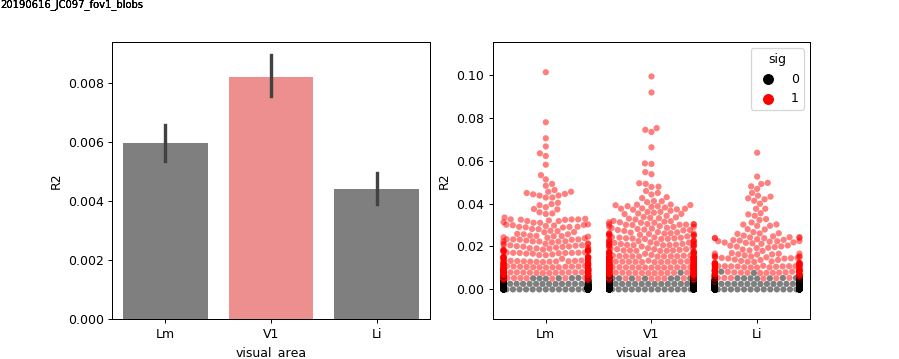

<IPython.core.display.Javascript object>


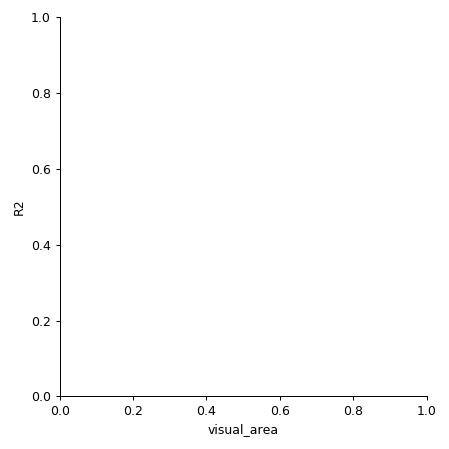

<IPython.core.display.Javascript object>


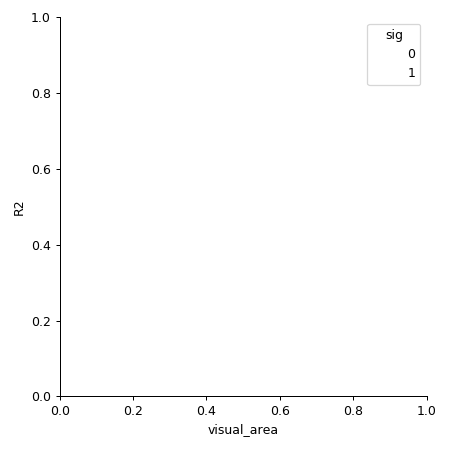

In [699]:
fig, ax = pl.subplots(1,2, figsize=(10,4))
sns.catplot(x='visual_area', y='R2', kind='bar',  data=R2_f, palette=['k', 'r'], #['k', 'r'],
            #hue='sig',
            alpha=0.5, height=5, legend_out=False, ax=ax[0]) #, ax=ax) #, ax=ax) #color='k', alpha=0.1, ax=ax)

sns.catplot(x='visual_area', y='R2', kind='swarm',  data=R2_f, palette=['k', 'r'], #['k', 'r'],
            hue='sig',
            alpha=0.5, height=5, legend_out=False, ax=ax[1]) #, ax=ax) #, ax=ax) #color='k', alpha=0.1, ax=ax)


pl.ylabel('R2')

pl.show()

In [502]:
R2_all = pd.concat(R2list, axis=0)

In [504]:
R2_all['sig'] = [1 if p<0.01 else 0 for p in R2_all['pval']]
R2_all.head()

,R2,datakey,pval,visual_area,sig
0,NaN,20190605_JC090_fov1_blobs,NaN,Li,0
1,NaN,20190605_JC090_fov1_blobs,NaN,Li,0
2,NaN,20190605_JC090_fov1_blobs,NaN,Li,0
3,NaN,20190605_JC090_fov1_blobs,NaN,Li,0
4,NaN,20190605_JC090_fov1_blobs,NaN,Li,0


<IPython.core.display.Javascript object>


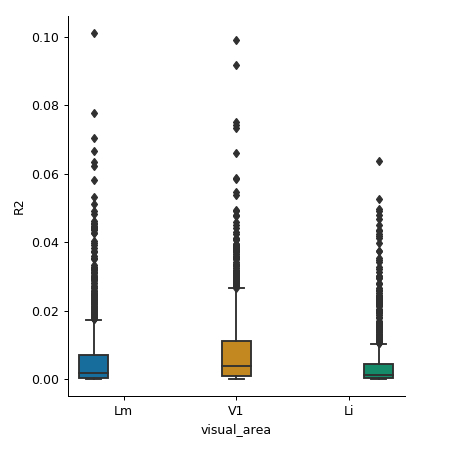

In [702]:
#fig, ax = pl.subplots()

R2_f['sig'] = [1 if p<0.01 else 0 for p in R2_f['pval']]
#R2['empty'] = [1 for _ in np.arange(0, R2.shape[0])]


sns.catplot(x='visual_area', y='R2', kind='box', palette='colorblind', #['k', 'r'],
            hue='visual_area', data=R2_f) #, 
            #alpha=0.5, height=5, legend_out=False, ax=ax) #, ax=ax) #color='k', alpha=0.1, ax=ax)

pl.ylabel('R2')
#pl.xticks([])
#pl.xlabel('')

pl.subplots_adjust(right=0.9)
label_figure(fig, datakey)


<IPython.core.display.Javascript object>


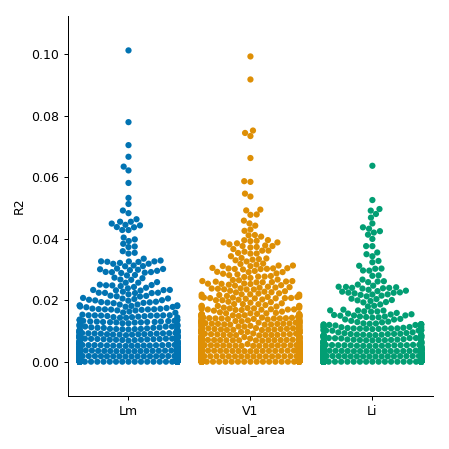

In [704]:
#fig, ax = pl.subplots()

R2_f['sig'] = [1 if p<0.05 else 0 for p in R2_f['pval']]
#R2['empty'] = [1 for _ in np.arange(0, R2.shape[0])]

sns.catplot(x='visual_area', y='R2', kind='swarm', palette='colorblind', #hue='sig', 
            data=R2_f) #, ax=ax) #color='k', alpha=0.1, ax=ax)
pl.ylabel('R2')
#pl.xticks([])
#pl.xlabel('')

label_figure(fig, datakey)

# Filter

In [22]:
def get_dists_between_bodyparts(bp1, bp2, df, DLCscorer=None):

    if DLCscorer is not None:
        coords1 = [np.array([x, y]) for x, y, in zip(df[DLCscorer][bp1]['x'].values, df[DLCscorer][bp1]['y'].values)]
        coords2 = [np.array([x, y]) for x, y, in zip(df[DLCscorer][bp2]['x'].values, df[DLCscorer][bp2]['y'].values)]
    else:
        coords1 = [np.array([x, y]) for x, y, in zip(df[bp1]['x'].values, df[bp1]['y'].values)]
        coords2 = [np.array([x, y]) for x, y, in zip(df[bp2]['x'].values, df[bp2]['y'].values)]

    dists = np.array([np.linalg.norm(c1-c2) for c1, c2 in zip(coords1, coords2)])
    return dists


In [479]:
def calculate_pupil_metrics(dlc_outfile, filtered=False, threshold=0.99):

    bodyparts = ['pupilT', 'pupilB', 'pupilL', 'pupilR', 'cornealR']

    df = pd.read_hdf(dlc_outfile)
    
    if df.shape[0] < 5: # sth wrong
        return None, None
    
    filtdf = df.copy()
    filtdf = filtdf[DLCscorer][bodyparts][filtdf[DLCscorer][bodyparts] >= threshold].dropna()
    kept_ixs = filtdf.index.tolist()
    
    #print(df.shape)
    #print(filtdf.shape)


    if filtered:
        pupil_dists_major = get_dists_between_bodyparts('pupilT', 'pupilB', filtdf, DLCscorer=None)
        pupil_dists_minor = get_dists_between_bodyparts('pupilL', 'pupilR', filtdf, DLCscorer=None)
    else:
        pupil_dists_major = get_dists_between_bodyparts('pupilT', 'pupilB', df, DLCscorer=DLCscorer)
        pupil_dists_minor = get_dists_between_bodyparts('pupilL', 'pupilR', df, DLCscorer=DLCscorer)

    if not filtered:
        #print("Replacing bad vals")
        replace_ixs = np.array([i for i in np.arange(0, df.shape[0]) if i not in kept_ixs])
        if len(replace_ixs) > 0:
            pupil_dists_major[replace_ixs] = np.nan
            pupil_dists_minor[replace_ixs] = np.nan

        
    return pupil_dists_major, pupil_dists_minor


# Get eyetracker acquisition info

In [24]:
import json
from pipeline.python.classifications import experiment_classes as util

In [467]:
def check_missing_frames(frame_attrs, metadata):
    '''
    frame_attrs : pd.DataFrame with columns 
        frame_number
        sync_in1
        sync_in2
        time_stamp
        
    These are NaNs, and will be interpolated. Matters for time_stamp.
    
    Returns:
        interpdf, the interpolated dataframe
        
    '''
    print("Checking for missing frames.")
    if metadata is None:
        fps = 20.0
        metadata = {'frame_period': (1./fps)}
    tmpdf = frame_attrs.copy()
    missed_ixs = [m-1 for m in np.where(frame_attrs['time_stamp'].diff() > float(metadata['frame_period']*1.5))[0]]
    print(missed_ixs)
    print("... found %i funky frame chunks." % len(missed_ixs))
    for mi in missed_ixs:
        # Identify duration of funky interval and how many missed frames it is:
        missing_interval = frame_attrs['time_stamp'][mi+1] - frame_attrs['time_stamp'][mi] 
        n_missing_frames = round(missing_interval/metadata['frame_period'], 0) -1
        print("... interpolating %i frames" % n_missing_frames)

        add_missing = pd.DataFrame({
                      'frame_number': [np.nan for _ in np.arange(0, n_missing_frames)], #np.arange(mi+1, mi+n_missing_frames+1),
                      'sync_in1': [np.nan for _ in np.arange(0, n_missing_frames)],
                      'sync_in2': [np.nan for _ in np.arange(0, n_missing_frames)],
                      #'time_stamp': [frame_attrs['time_stamp'][mi]+(float(metadata['frame_period'])*i) \
                      #               for i in np.arange(1, n_missing_frames+1)]},
                      'time_stamp': [np.nan for _ in np.arange(0, n_missing_frames)]},
                                  index=np.linspace(mi, mi+1, n_missing_frames+2)[1:-1])


        print("... adding %i frames" % add_missing.shape[0])
        df2 = pd.concat([tmpdf.iloc[:mi+1], add_missing, tmpdf.iloc[mi+1:]]) #.reset_index(drop=True)
        tmpdf = df2.copy()
        
    #df2 = tmpdf.reset_index(drop=True)

    interpdf = tmpdf.interpolate().reset_index(drop=True)
    print("... frame info shape changed from %i to %i frames" % (frame_attrs.shape[0], interpdf.shape[0]))
    
    return interpdf

In [468]:
def get_metaface_for_run(curr_src):

    #run_num = int(re.search(r"_f\d{1}_", os.path.split(curr_src)[-1]).group().split('_')[1][1:])
    
    try:
        run_num = int(re.search(r"_f\d{1}_", os.path.split(curr_src)[-1]).group().split('_')[1][1:])
    except Exception as e:
        run_num = int(re.search(r"_f\d{2}_", os.path.split(curr_src)[-1]).group().split('_')[1][1:])

    print("----- File %i.-----" % run_num)

    # Get meta data for experiment
    #errors = []
    metadata = None
    performance_info = os.path.join(curr_src, 'times', 'performance.txt')
    try:
        metadata = pd.read_csv(performance_info, sep="\t ")
        fps = float(metadata['frame_rate'])
        #print(metadata)
    except Exception as e:
        print('****[%s]**** ERROR:' % curr_src, e)
        
        #errors.append(curr_src)

    # Get frame info
    frame_info = os.path.join(curr_src, 'times', 'frame_times.txt')
    try:
        frame_attrs = pd.read_csv(frame_info, sep="\t ")
        #print(frame_attrs.head())
        #print("...loaded frames:", frame_attrs.shape)
    except Exception as e:
        print(e)

    frames = check_missing_frames(frame_attrs, metadata)
    #print("... adjusted for missing frames:", frames.shape)

    tif_dur_sec = frames.iloc[-1]['time_stamp'] / 60.
    print("Full run duration: %.2f min" % tif_dur_sec)
    
    return frames


# Get paradigm info

In [129]:
epoch = 'stimulus_on'
pre_ITI_ms = 1000
post_ITI_ms = 1000


# Get eyetracker frame indices for ALL trials in run

In [319]:
def align_trials_to_facedata(animalid, session, fovnum, curr_exp, rootdir='/n/coxfs01/2p-data',
                            eyetracker_dir='/n/coxfs01/2p-data/eyetracker_tmp',
                            blacklist=['20191018_JC113_fov1_blobs_run5']):
    
    '''
    Align MW trial events/epochs to eyetracker data for each trial, 
        i.e., matches eyetracker data to each "run" of a given experiment type.
        Typically, 1 eyetracker movie for each paradigm file.
    
    Returns:
        dataframe of start/end indices for each trial across all eyetracker movies in all the runs.
    '''
    
    epoch = 'stimulus_on'
    pre_ITI_ms = 1000
    post_ITI_ms = 1000

    datakey ='%s_%s_fov%i_%s' % (session, animalid, fovnum, curr_exp)    

    # Get all runs for the current experiment
    all_runs = sorted(glob.glob(os.path.join(rootdir, animalid, session, 'FOV%i*' % fovnum,\
                          '%s*_run*' % curr_exp)), key=natural_keys)

    run_list = [int(os.path.split(rundir)[-1].split('_run')[-1]) for rundir in all_runs]
    print("[%s] Found runs:" % curr_exp, run_list)
    
    # Eyetracker source files
    print("... finding movies for dset: %s" % datakey)
    facetracker_srcdirs = sorted(glob.glob(os.path.join(eyetracker_dir, '%s*' % (datakey))), key=natural_keys)
    for si, sd in enumerate(facetracker_srcdirs):
        print(si, sd)

    # Align facetracker frames to MW trials based on time stamps
    facemeta = []
    for run_num in run_list:
        print("--- |%s|: getting MW info for run_%i" % (curr_exp, run_num))
        
        if '%s_%s_fov%i_%s_run%i' % (session, animalid, fovnum, curr_exp, run_num) in blacklist:
            continue
        
        # Get MW info for this run
        mw_file = glob.glob(os.path.join(rootdir, animalid, session, 'FOV%i*' % fovnum,\
                                        '*%s*_run%i' % (curr_exp, run_num), 'paradigm', 'trials_*.json'))[0]
        with open(mw_file, 'r') as f:
            mw = json.load(f)

        trialnames = sorted(mw.keys(), key=natural_keys)
        start_t = mw[trialnames[0]]['start_time_ms']
        end_t = mw[trialnames[0]]['end_time_ms']

        # Get corresponding eyetracker dir for run
        curr_face_srcdir = [s for s in facetracker_srcdirs if '_f%i_' % run_num in s][0]
        print('Eyetracker:', os.path.split(curr_face_srcdir)[-1])

        # Get eyetracker metadata
        faceframes_meta = get_metaface_for_run(curr_face_srcdir)

        #face_indices = {}
        for tix, curr_trial in enumerate(sorted(mw.keys(), key=natural_keys)):

            parafile = str(os.path.split(mw[curr_trial]['behavior_data_path'])[-1])
            #print('Paradigm:', parafile)
            if run_num >= 10:
                trial_run_num = int(re.search(r"_f\d{2}.", parafile).group().split('_')[1][1:-1])
            else:
                trial_run_num = int(re.search(r"_f\d{1}.", parafile).group().split('_')[1][1:-1])
            assert trial_run_num == run_num, "Bad run assignment: %s (should be %i)" % (parafile, run_num)

            # Get SI triggers for start and end of trial
            if 'retino' in curr_exp:
                trial_num = int(curr_trial)
                curr_trial_triggers = mw[str(curr_trial)]['stiminfo']['trigger_times']
                units = 1E6
            else:
                trial_num = int(curr_trial[5:])
                if epoch == 'trial_alignment':
                    stim_on_ms = mw[curr_trial]['start_time_ms']
                    stim_dur_ms = mw[curr_trial]['stim_dur_ms']
                    curr_trial_triggers = [stim_on_ms - pre_ITI_ms, stim_on_ms + stim_dur_ms + post_ITI_ms]
                elif epoch == 'stimulus_on':
                    stim_on_ms = mw[curr_trial]['start_time_ms']
                    stim_dur_ms = mw[curr_trial]['stim_dur_ms']
                    curr_trial_triggers = [stim_on_ms, stim_on_ms + stim_dur_ms]

                else:
                    curr_trial_triggers = [mw[curr_trial]['start_time_ms'], mw[curr_trial]['end_time_ms']]
                units = 1E3

            # Calculate trial duration in secs
            # nsecs_trial = ( (curr_trial_triggers[1] - curr_trial_triggers[0]) / units ) 
            # Get number of eyetracker frames this corresponds to
            # nframes_trial = nsecs_trial * metadata['frame_rate']

            # Get start time and end time of trial (or tif) relative to start of RUN
            trial_start_sec = (curr_trial_triggers[0] - start_t) / units
            trial_end_sec = (curr_trial_triggers[-1] - start_t) / units
            #print("Rel trial start/stop (sec):", trial_start_sec, trial_end_sec)

            # Get corresponding eyetracker frame indices for start and end time points
            eye_start = np.where(abs(faceframes_meta['time_stamp']-trial_start_sec) == (abs(faceframes_meta['time_stamp']-trial_start_sec).min()))[0][0]
            eye_end = np.where(abs(faceframes_meta['time_stamp']-trial_end_sec) == (abs(faceframes_meta['time_stamp']-trial_end_sec).min()) )[0][0]
            #print("Eyetracker start/stop frames:", eye_start, eye_end)

            #face_indices[trial_num] = (eye_start, eye_end)

            face_movie = '_'.join(os.path.split(curr_face_srcdir)[-1].split('_')[0:-1])
            tmpdf = pd.DataFrame({'start_ix': eye_start,
                                  'end_ix': eye_end,
                                  'trial_in_run': trial_num,
                                  'run_num': run_num,
                                  'movie': face_movie}, index=[tix])

            facemeta.append(tmpdf)

    facemeta = pd.concat(facemeta, axis=0).reset_index(drop=True)

    return facemeta


# Add stimulus config info to face meta data

In [30]:
def reformat_morph_values(sdf):
    control_ixs = sdf[sdf['morphlevel']==-1].index.tolist()
    sizevals = np.array([round(s, 1) for s in sdf['size'].unique() if s not in ['None', None] and not np.isnan(s)] )
    sdf.loc[sdf.morphlevel==-1, 'size'] = pd.Series(sizevals, index=control_ixs)
    sdf['size'] = [round(s, 1) for s in sdf['size'].values]

    return sdf


# Extract pupil info for each trial

In [766]:
# # DLC outfiles
# dlc_outfiles = sorted(glob.glob(os.path.join(analysis_dir, '%s*.h5' % datakey)), key=natural_keys)
# dlc_outfiles

# # Eyetracker source files
# print("... finding movies for dset: %s" % datakey)
# facetracker_srcdirs = sorted(glob.glob(os.path.join(eyetracker_dir, '%s*' % (datakey))), key=natural_keys)

# for si, sd in enumerate(facetracker_srcdirs):
#     print(si, sd)

# # Check that run num is same for PARA file and DLC results
# for fd, od in zip(facetracker_srcdirs, dlc_outfiles):
#     fsub = os.path.split(fd)[-1]
#     osub = os.path.split(od)[-1]
    
#     face_fnum = int(re.search(r"_f\d{1}_", fsub).group().split('_')[1][1:])
#     dlc_fnum = int(re.search(r"_f\d{1}D", osub).group().split('_')[1][1:-1])
    
#     assert dlc_fnum == face_fnum, "incorrect match: %s / %s" % (fsub, osub)
    


In [471]:
def parse_pose_data(datakey, analysis_dir, eyetracker_dir='/n/coxfs01/2p-data/eyetracker_tmp'):

    '''
    Loads DLC pose analysis results, extracts some feature of the behavior for all runs of the experiment.
    
    Returns:
        dataframe that contains all analyzed (and thresholded) frames for all runs.
    '''
    # DLC outfiles
    dlc_outfiles = sorted(glob.glob(os.path.join(analysis_dir, '%s*.h5' % datakey)), key=natural_keys)
    #print(dlc_outfiles)

    # Eyetracker source files
    print("... checking movies for dset: %s" % datakey)
    facetracker_srcdirs = sorted(glob.glob(os.path.join(eyetracker_dir, '%s*' % (datakey))), key=natural_keys)
    print("... found %i DLC outfiles, expecting %i based on found eyetracker dirs." % (len(dlc_outfiles), len(facetracker_srcdirs)))
    
    # Check that run num is same for PARA file and DLC results
    for fd, od in zip(facetracker_srcdirs, dlc_outfiles):
        fsub = os.path.split(fd)[-1]
        osub = os.path.split(od)[-1]
        try:
            face_fnum = int(re.search(r"_f\d{1}_", fsub).group().split('_')[1][1:])
            dlc_fnum = int(re.search(r"_f\d{1}D", osub).group().split('_')[1][1:-1])
        except Exception as e:
            face_fnum = int(re.search(r"_f\d{2}_", fsub).group().split('_')[1][1:])
            dlc_fnum = int(re.search(r"_f\d{2}D", osub).group().split('_')[1][1:-1])
        assert dlc_fnum == face_fnum, "incorrect match: %s / %s" % (fsub, osub)

    bad_files = []
    pupildata = []
    for dlc_outfile in sorted(dlc_outfiles, key=natural_keys):
        run_num=None
        try:
            run_num = int(re.search(r"_f\d{1}D", os.path.split(dlc_outfile)[-1]).group().split('_')[1][1])
        except Exception as e:
            run_num = int(re.search(r"_f\d{2}D", os.path.split(dlc_outfile)[-1]).group().split('_')[1][1])
        
        assert run_num is not None, "Unable to find run_num for file: %s" % dlfile
        print("...curr run: %i [%s]" % (run_num, os.path.split(dlc_outfile)[-1]))

        # Get corresponding DLC results for movie
        #dlc_outfile = [s for s in dlc_outfiles if '_f%iD' % run_num in s][0]
        
        # Calculate some statistic from pose data
        pupil_dists_major, pupil_dists_minor = calculate_pupil_metrics(dlc_outfile)
        
        if pupil_dists_major is None and pupil_dists_minor is None:
            bad_files.append(dlc_outfile)
            continue

        pdf = pd.DataFrame({'pupil_maj': pupil_dists_major,
                            'pupil_min': pupil_dists_minor,
                            'run_num': [run_num for _ in np.arange(0, len(pupil_dists_major))],
                            'index': np.arange(0, len(pupil_dists_major))},
                              index=np.arange(0, len(pupil_dists_major)))

        pupildata.append(pdf)

    pupildata = pd.concat(pupildata, axis=0)
    return pupildata, bad_files

In [336]:
def get_per_trial_metrics(pupildata, facedf, sdf):
    config_names = np.unique(sdf.index.tolist())

    pupilstats_by_config = dict((k, []) for k in config_names)
    pupilstats = []

    #fig, ax = pl.subplots()
    for tix, (trial, g) in enumerate(facedf.groupby(['trial'])):

        # Get run of experiment that current trial is in
        run_num = g['run_num'].unique()[0]
        if run_num not in pupildata['run_num'].unique():
            print("--- [trial %i] warning, run_num %i not found in pupildata. skipping..." % (trial, run_num))
            continue
            
        pupil_dists_major = pupildata[pupildata['run_num']==run_num]['pupil_maj']

        # Get start/end indices of current trial in run
        (eye_start, eye_end), = g[['start_ix', 'end_ix']].values

        #eye_tpoints = frames['time_stamp'][eye_start:eye_end+1]
        eye_values = pupil_dists_major[eye_start:eye_end+1]
        
        # If all nan, get rid of this trial
        if all(np.isnan(eye_values)):
            continue
            
        curr_config = g['config'].iloc[0]
        curr_cond = sdf['size'][curr_config]    
        #ax.plot(eye_values.values, color=cond_colors[curr_cond])

        #print(trial, np.nanmean(eye_values))
        pupilstats_by_config[curr_config].append(np.nanmean(eye_values))

        pdf = pd.DataFrame({'pupil': np.nanmean(eye_values),
                            'config': curr_config,
                            'trial': trial}, index=[tix])

        pupilstats.append(pdf)

    pupilstats = pd.concat(pupilstats, axis=0)
    
    return pupilstats

# Combine pupil data for all trials 

In [472]:
def get_face_and_neural_stats(animalid, session, fovnum, curr_exp, analysis_dir,
                                   traceid='traces001',
                                   eyetracker_dir='/n/coxfs01/2p-data/eyetracker_tmp'):
    
    # Load experiment neural data
    fov = 'FOV%i_zoom2p0x' % fovnum
    exp = util.Objects(animalid, session, fov, traceid=traceid)
    exp.load(trace_type='dff', update_self=True, make_equal=True)
    labels = exp.data.labels.copy()

    # Get stimulus config info
    sdf = exp.data.sdf
    sdf = reformat_morph_values(sdf)
    n_conditions = len(sdf['size'].unique())
    color_list = sns.color_palette('cubehelix', n_conditions)
    cond_colors = dict((k, color_list[i]) for i, k in enumerate(sorted(sdf['size'].unique()))) #.keys()))

    # ----- PUPIL/FACE STUFF -------------------------------

    # Get metadata for facetracker
    facemeta = align_trials_to_facedata(animalid, session, fovnum, curr_exp, eyetracker_dir=eyetracker_dir)
    
    # Get pupil data
    datakey ='%s_%s_fov%i_%s' % (session, animalid, fovnum, curr_exp)  
    pupildata, bad_files = parse_pose_data(datakey, analysis_dir, eyetracker_dir=eyetracker_dir)

    # Add stimulus config info to face data
    trial_key = pd.DataFrame({'config': [g['config'].unique()[0] \
                             for trial, g in labels.groupby(['trial'])],
                  'trial': [int(trial[5:]) \
                             for trial, g in labels.groupby(['trial'])]})
    facedf = pd.concat([facemeta, trial_key], axis=1)
    
    # Calculate a pupil metric for each trial
    pupilstats = get_per_trial_metrics(pupildata, facedf, sdf)

    # ----- NEURAL STUFF -------------------------------
    # Get nrois x ntrials array
    roi_responses = pd.DataFrame(np.vstack([exp.data.traces.iloc[g.index].mean(axis=0)\
                                        for trial, g in labels.groupby(['trial'])]))

    # Get responsive cells
    responsive_cells, ncells_total = exp.get_responsive_cells(response_type='dff',\
                                                              responsive_test='ROC', responsive_thr=0.05)
    print("%i out of %i cells pass responsive test." % (len(responsive_cells), ncells_total))
    neuraldata = roi_responses[responsive_cells]

    return pupilstats, neuraldata, labels
    

# Get pupil residuals

In [649]:
residuals_pupil = pupilstats.copy()
for c, g in pupilstats.groupby(['config']):
    residuals_pupil['pupil'][g.index] = pupilstats.loc[g.index]['pupil'] - pupilstats.loc[g.index]['pupil'].mean()

/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [555]:
plot_residuals = False

if plot_residuals:
    fig, ax = pl.subplots() #pl.figure()
    for c, g in residuals_pupil.groupby(['config']):
        ax.plot(g['pupil'].dropna(), alpha=0.5)


In [554]:
# for config, g in trial_key.groupby(['config']):
#    print(g.shape)

# Get neural responses and residuals

In [667]:


def fit_linear_model(residuals_pupil, residuals_neural, datakey, visual_area, indepvar_x='pupildiam'):

    responsive_cells = residuals_neural.columns.tolist()
    pupil_values = residuals_pupil.sort_values(by='trial')['pupil']
    #dropped_ = np.where(np.isnan(pupil_values))[0]
    #keep_ = np.array([i for i in np.arange(0, len(pupil_values)) if i not in dropped_])
    dropped_ = np.array([i for i in pupil_values.index.tolist() if np.isnan(i)])
    keep_ = np.array([i for i in pupil_values.index.tolist() if i not in dropped_])

    #xdf = residuals_neural.iloc[keep_].copy()
    xdf = residuals_neural.loc[keep_].copy()
    xdf['pupildiam'] = pupil_values[keep_].copy()

    ols = {}
    for rid in responsive_cells:
        roi_index = list(responsive_cells).index(rid)

        model = sm.OLS(xdf[rid], sm.add_constant(xdf[indepvar_x]))
        modelfit = model.fit()
        p = modelfit.params

        ols[rid] = modelfit


    R2 = pd.DataFrame({'R2': [ols[rid].rsquared for rid in responsive_cells],
                       'pval': [ols[rid].f_pvalue for rid in responsive_cells],
                       'datakey': [datakey for _ in np.arange(0, len(responsive_cells))],
                       'visual_area': [visual_area for _ in np.arange(0, len(responsive_cells))]})
    return ols, R2



In [561]:
R2_all[R2_all['datakey']==datakey].shape

(141, 5)

In [608]:
residuals_neural = DATA[datakey]['residuals_neural']
residuals_pupil = DATA[datakey]['residuals_pupil']
responsive_cells = residuals_neural.columns.tolist()
print(len(responsive_cells))

141


In [609]:
pupil_values = residuals_pupil.sort_values(by='trial')['pupil']

In [610]:
residuals_pupil.head()

,config,pupil,trial
0,config025,2.946112,1.0
1,config024,-0.233637,2.0
2,config046,-1.472992,3.0
3,config013,0.046228,4.0
4,config002,-2.872295,5.0


In [611]:
residuals_neural.shape

(1582, 141)

In [641]:
#dropped_ = np.where(np.isnan(pupil_values))[0]
#keep_ = np.array([i for i in np.arange(0, len(pupil_values)) if i not in dropped_])

dropped_ = [i for i in pupil_values.index.tolist() if np.isnan(i)]
keep_ = np.array([i for i in pupil_values.index.tolist() if i not in dropped_])

print("N Nans:", len(dropped_))
print("N keep:", len(keep_))


('N Nans:', 0)
('N keep:', 1582)


In [642]:
dropped_ixs = np.where(np.isnan(pupil_values))[0]
dropped_trs = np.array([i for i in pupil_values.index.tolist() if np.isnan(i)])

keep_ixs = np.array([i for i in np.arange(0, len(pupil_values)) if i not in dropped_])
keep_trs = np.array([i for i in pupil_values.index.tolist() if i not in dropped_trs])


In [644]:
#xdf = residuals_neural.iloc[keep_].copy()
xdf = residuals_neural.loc[keep_].copy()
xdf['pupildiam'] = pupil_values[keep_].copy()


In [651]:
residuals_neural.shape

(1582, 141)

In [650]:
max(keep_)

1581

In [645]:
xdf.head()

,0,1,4,6,7,13,22,24,25,27,...,254,258,259,260,261,264,265,269,270,pupildiam
0,0.536666,-0.242237,0.276863,0.552535,-0.051407,-0.180313,0.003977,-0.036779,0.138382,0.464793,...,0.400809,0.327629,0.320027,0.479045,0.832553,-0.082252,0.327724,0.164935,-0.010489,2.946112
1,0.359389,0.034676,-0.091373,0.006093,-0.074069,-0.110579,-0.027672,-0.039527,-0.088495,0.060424,...,0.006097,0.355125,-0.053250,-0.151231,-0.093623,0.219817,-0.002453,0.077677,-0.022610,-0.233637
2,-0.356232,0.131639,-0.154972,-0.075936,-0.060184,0.038357,0.067955,-0.084018,-0.003566,0.101943,...,-0.131290,0.047555,-0.027075,0.033762,-0.081263,-0.079244,-0.027671,0.312830,0.123184,-1.472992
3,1.019509,-0.061945,0.136980,0.186179,0.018295,-0.042643,-0.115071,0.257502,0.154710,0.168349,...,0.008972,0.106587,0.125058,-0.012447,0.229084,-0.010587,0.068795,0.032344,-0.049751,0.046228
4,-0.061467,0.015477,-0.027016,-0.111911,-0.088562,0.122120,0.099153,-0.011372,0.211735,0.002475,...,-0.025114,-0.040375,0.070321,0.098636,-0.037986,0.127006,0.149954,-0.235430,0.014719,-2.872295


In [646]:
ols = {}
for rid in responsive_cells:
    roi_index = list(responsive_cells).index(rid)

    model = sm.OLS(xdf[rid], sm.add_constant(xdf['pupildiam']))
    modelfit = model.fit()
    #p = modelfit.params
    #modelfit.rquared

    ols[rid] = modelfit


In [647]:

R2 = pd.DataFrame({'R2': [ols[rid].rsquared for rid in responsive_cells],
                   'pval': [ols[rid].f_pvalue for rid in responsive_cells],
                   'datakey': [datakey for _ in np.arange(0, len(responsive_cells))],
                   'visual_area': [visual_area for _ in np.arange(0, len(responsive_cells))]})

In [648]:
model = sm.OLS(xdf[rid], sm.add_constant(xdf['pupildiam']))
modelfit = model.fit()
modelfit.params

const       NaN
pupildiam   NaN
dtype: float64

In [640]:
R2

,R2,datakey,pval,visual_area
0,6.926331e-05,20190605_JC090_fov1_blobs,0.740822,V1
1,2.914088e-03,20190605_JC090_fov1_blobs,0.031795,V1
2,9.989896e-04,20190605_JC090_fov1_blobs,0.208949,V1
3,4.066685e-05,20190605_JC090_fov1_blobs,0.799924,V1
4,6.107157e-03,20190605_JC090_fov1_blobs,0.001867,V1
5,9.266029e-04,20190605_JC090_fov1_blobs,0.226255,V1
6,1.496540e-05,20190605_JC090_fov1_blobs,0.877810,V1
7,2.802830e-04,20190605_JC090_fov1_blobs,0.505789,V1
8,1.006246e-03,20190605_JC090_fov1_blobs,0.207302,V1
9,1.675616e-04,20190605_JC090_fov1_blobs,0.606919,V1


In [551]:
# Get nrois x ntrials array
roi_responses = pd.DataFrame(np.vstack([exp.data.traces.iloc[g.index].mean(axis=0)\
                                    for trial, g in labels.groupby(['trial'])]))

# Get responsive cells
responsive_cells, ncells_total = exp.get_responsive_cells(response_type='dff',\
                                                          responsive_test='ROC', responsive_thr=0.05)
print("%i out of %i cells pass responsive test." % (len(responsive_cells), ncells_total))
neuraldata = roi_responses[responsive_cells]


In [559]:
trial_configs = pd.DataFrame(np.vstack([g['config'].iloc[0]\
                                    for trial, g in labels.groupby(['trial'])]), columns=['config'])

,config
0,config032
1,config031
2,config021
3,config020
4,config003
5,config043
6,config034
7,config005
8,config012
9,config009


In [604]:
residuals_neural = neuraldata.copy()

for c, g in trial_configs.groupby(['config']):
    residuals_neural.loc[g.index] = neuraldata.loc[g.index] - neuraldata.loc[g.index].mean(axis=0)

In [606]:
ols, R2 = fit_linear_model(residuals_pupil, residuals_neural)


In [607]:
datakey, R2

('20190605_JC090_fov1_blobs',
                R2                    datakey      pval visual_area
 0    6.926331e-05  20190605_JC090_fov1_blobs  0.740822          V1
 1    2.914088e-03  20190605_JC090_fov1_blobs  0.031795          V1
 2    9.989896e-04  20190605_JC090_fov1_blobs  0.208949          V1
 3    4.066685e-05  20190605_JC090_fov1_blobs  0.799924          V1
 4    6.107157e-03  20190605_JC090_fov1_blobs  0.001867          V1
 5    9.266029e-04  20190605_JC090_fov1_blobs  0.226255          V1
 6    1.496540e-05  20190605_JC090_fov1_blobs  0.877810          V1
 7    2.802830e-04  20190605_JC090_fov1_blobs  0.505789          V1
 8    1.006246e-03  20190605_JC090_fov1_blobs  0.207302          V1
 9    1.675616e-04  20190605_JC090_fov1_blobs  0.606919          V1
 10   1.007033e-06  20190605_JC090_fov1_blobs  0.968187          V1
 11   3.092700e-05  20190605_JC090_fov1_blobs  0.825077          V1
 12   1.784242e-04  20190605_JC090_fov1_blobs  0.595494          V1
 13   1.642839e-04

# Regression on residuals

In [36]:
import statsmodels.api as sm
from pipeline.python.utils import label_figure

/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [598]:
%matplotlib notebook

In [659]:
residuals_neural.shape

(1500, 100)

In [660]:
residuals_pupil.shape

(1500, 3)

In [661]:
residuals_pupil.head()

,config,pupil,trial
0,config032,9.269252,1
1,config031,4.447400,2
2,config021,9.180851,3
3,config020,6.928909,4
4,config003,1.817075,5


In [664]:
pupil_values = residuals_pupil.sort_values(by='trial')['pupil']
dropped_ = np.where(np.isnan(pupil_values))[0]
keep_ = np.array([i for i in np.arange(0, len(pupil_values)) if i not in dropped_])


In [676]:
# Look for 1 cell
neural_values = residuals_neural[responsive_cells[0]]

X = pupil_values[keep_].copy()
y = neural_values[keep_].copy()

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      1   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.945
Date:                Sun, 09 Feb 2020   Prob (F-statistic):             0.0263
Time:                        22:25:16   Log-Likelihood:                 2288.8
No. Observations:                1471   AIC:                            -4574.
Df Residuals:                    1469   BIC:                            -4563.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.001     -0.100      0.9

In [678]:
xdf = residuals_neural.iloc[keep_].copy()
xdf['pupildiam'] = pupil_values[keep_].copy()

In [667]:

ols = {}
for rid in responsive_cells:
    roi_index = list(responsive_cells).index(rid)

    model = sm.OLS(xdf[rid], sm.add_constant(xdf[indepvar_x]))
    modelfit = model.fit()
    p = modelfit.params

    ols[rid] = modelfit


In [686]:
fig.get_facecolor()


(1.0, 1.0, 1.0, 0)

<IPython.core.display.Javascript object>


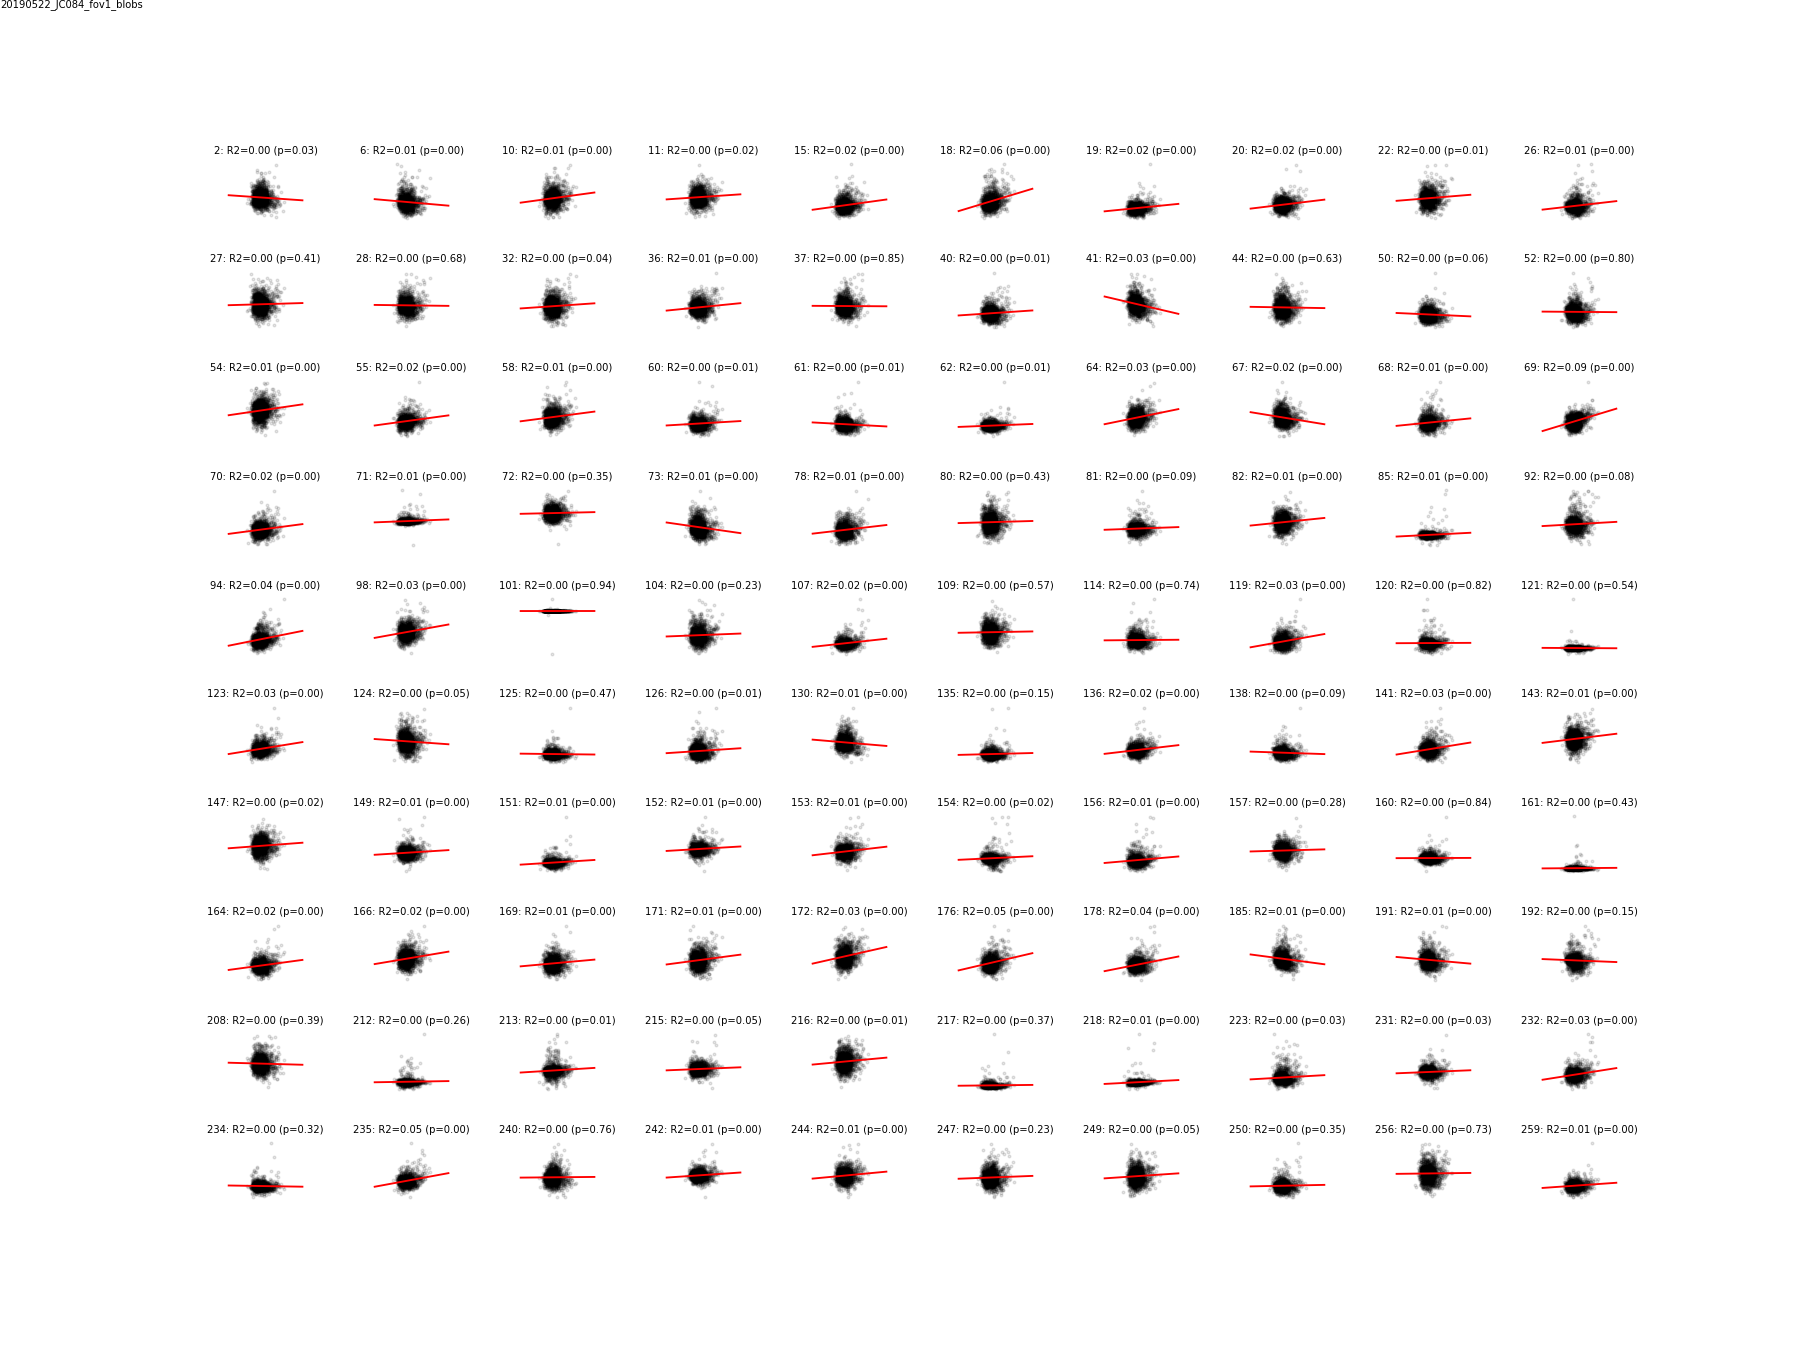

In [695]:
nr = 10
nc = 10

ai = 0
fig, axes = pl.subplots(nr, nc, figsize=(nc*2, nr*1.5))
fig.patch.set_alpha(1)

for rid in responsive_cells:
    ax = axes.flat[ai]
    roi_index = list(responsive_cells).index(rid)
    
    # scatter-plot data
    ax = xdf.plot(x=indepvar_x, y=rid, kind='scatter', alpha=0.1, s=5, c='k', ax=ax)
    #ax.scatter(x_test, y_test,  color='black', alpha=0.5, s=5)

    # generate x-values for your regression line (two is sufficient)
    vmin = xdf[indepvar_x].min()
    vmax = xdf[indepvar_x].max()
    vrange = vmax - vmin
    x = np.linspace(vmin-vrange*.5, vmax+vrange*.5, 3)

    # plot regression line on the same axes, set x-axis limits
    p = ols[rid].params
    ax.plot(x, p.const + p[indepvar_x] * x, color='r')
    #ax.set_xlim([1, 2])

    #modelfit.summary()

    statstr = 'R2=%.2f (p=%.2f)' % (ols[rid].rsquared, ols[rid].f_pvalue)
    #ax.set_title(statstr)

    ax.set_title('%i: %s' % (int(rid+1), statstr), fontsize=8)
    ax.axis('off')

    ai += 1
    
pl.subplots_adjust(hspace=0.8, wspace=0.8)
label_figure(fig, datakey)

[513,
 518,
 519,
 11,
 15,
 530,
 19,
 20,
 22,
 24,
 26,
 28,
 31,
 32,
 34,
 42,
 43,
 48,
 50,
 51,
 54,
 55,
 58,
 59,
 60,
 62,
 65,
 66,
 523,
 69,
 72,
 74,
 75,
 76,
 77,
 85,
 109,
 531,
 126,
 134,
 135,
 137,
 138,
 166,
 169,
 176,
 187,
 196,
 205,
 206,
 209,
 211,
 219,
 234,
 235,
 242,
 243,
 248,
 249,
 251,
 252,
 255,
 256,
 257,
 261,
 266,
 267,
 270,
 272,
 277,
 303,
 304,
 305,
 311,
 316,
 317,
 322,
 326,
 327,
 331,
 332,
 333,
 334,
 341,
 343,
 354,
 362,
 370,
 376,
 378,
 382,
 383,
 387,
 396,
 399,
 401,
 404,
 409,
 414,
 417,
 418,
 429,
 438,
 441,
 447,
 448,
 449,
 453,
 455,
 456,
 457,
 458,
 459,
 464,
 484,
 495,
 496,
 497,
 498,
 499,
 510,
 511]

In [790]:
responsive_cells = ols.keys()
R2 = pd.DataFrame({'R2': [ols[rid].rsquared for rid in responsive_cells],
                   'pval': [ols[rid].f_pvalue for rid in responsive_cells]})
R2['sig'] = [1 if p<0.05 else 0 for p in R2['pval']]
R2['empty'] = [1 for _ in np.arange(0, R2.shape[0])]

<IPython.core.display.Javascript object>


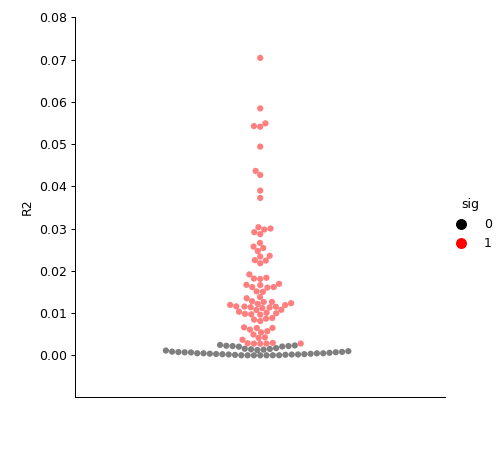

In [791]:

sns.catplot(x='empty', y='R2', kind='swarm', palette=['k', 'r'],
            hue='sig', data=R2, alpha=0.5) #, ax=ax) #color='k', alpha=0.1, ax=ax)
pl.ylabel('R2')
pl.xticks([])
pl.xlabel('')

label_figure(fig, datakey)

# Distribution of R2

In [702]:
R2 = pd.DataFrame({'R2': [ols[rid].rsquared for rid in responsive_cells],
                   'pval': [ols[rid].f_pvalue for rid in responsive_cells]})
R2['sig'] = [1 if p<0.05 else 0 for p in R2['pval']]

In [711]:
R2['empty'] = [1 for _ in np.arange(0, R2.shape[0])]

<IPython.core.display.Javascript object>


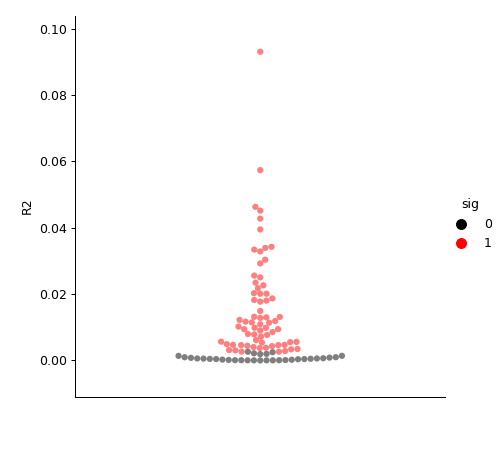

In [716]:

sns.catplot(x='empty', y='R2', kind='swarm', palette=['k', 'r'],
            hue='sig', data=R2, alpha=0.5) #, ax=ax) #color='k', alpha=0.1, ax=ax)
pl.ylabel('R2')
pl.xticks([])
pl.xlabel('')

label_figure(fig, datakey)



<IPython.core.display.Javascript object>


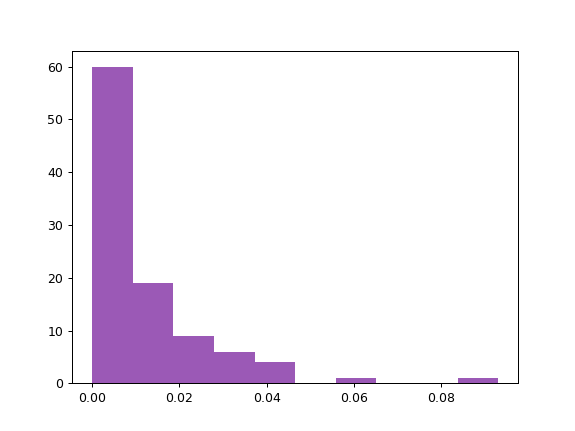

(array([ 60.,  19.,   9.,   6.,   4.,   0.,   1.,   0.,   0.,   1.]),
 array([  4.17311769e-06,   9.31060022e-03,   1.86170273e-02,
          2.79234544e-02,   3.72298815e-02,   4.65363086e-02,
          5.58427357e-02,   6.51491628e-02,   7.44555899e-02,
          8.37620170e-02,   9.30684441e-02]),
 <a list of 10 Patch objects>)

In [717]:
pl.figure()
pl.hist(R2['R2'])